<a href="https://colab.research.google.com/github/sagarrokad1/Rossman-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Libraries & Data

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Retail Sales Prediction - Sagar Rokad/Data/Rossmann Stores Data.csv', low_memory= False)

In [4]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Retail Sales Prediction - Sagar Rokad/Data/store.csv', low_memory= False)

## **Analysing the Rossman Dataset**

In [5]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


##### **Checking Information about Dataset**

In [7]:
rossman_df.shape

(1017209, 9)

In [8]:
#Checking info of data as data types and rows and cols
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
#Checking Null Values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**Summary Statastics Of Dataset**

In [10]:
#Summary Statastics
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
#No. Of Stores in the Dataset
rossman_df.Store.nunique()

1115

In [12]:
# Value_counts of StateHoliday Column

rossman_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [13]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])

rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [14]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


## **EDA On Rossman Dataset**

#### **Heatmap of the Rossman Dataset**

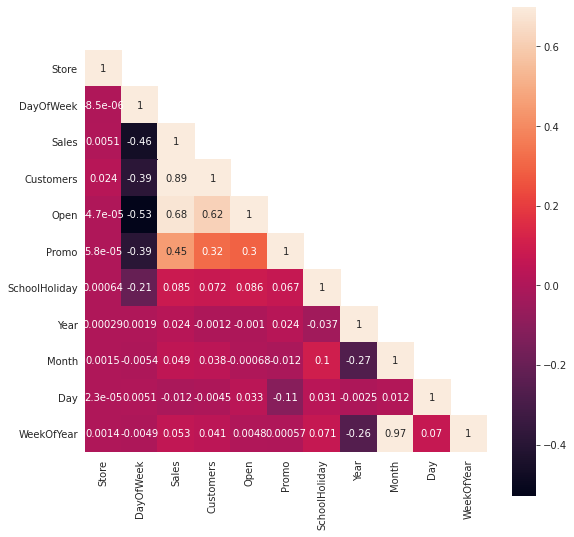

In [15]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

**As we can see that in the graph given below that Stores mainly closed on Sunday**

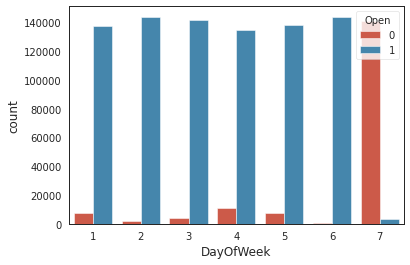

In [16]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


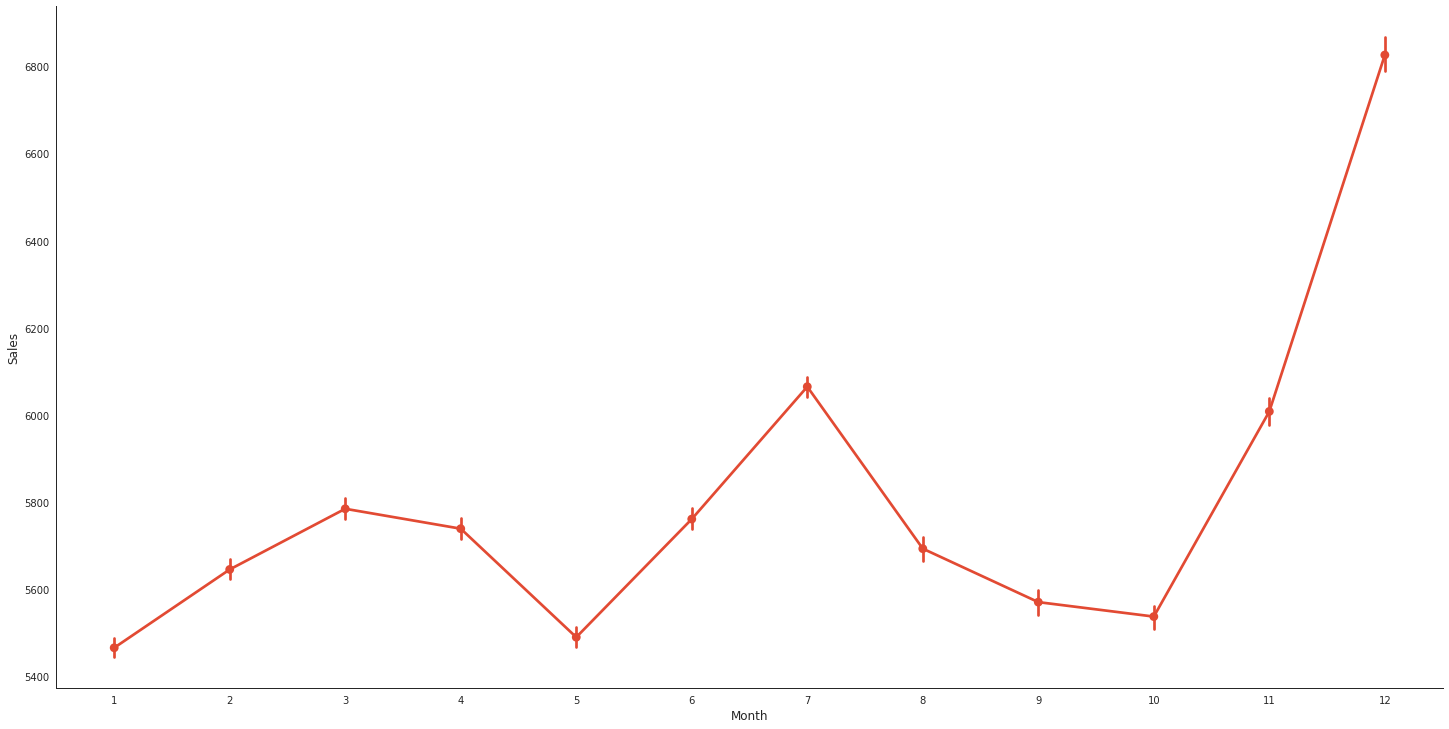

In [17]:
sns.factorplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2,size=10)

In [18]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

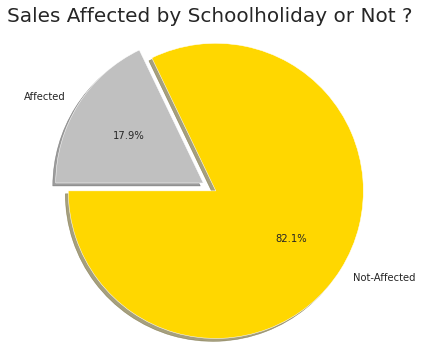

In [19]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Transforming Variable StateHoliday**

In [20]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [21]:
rossman_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

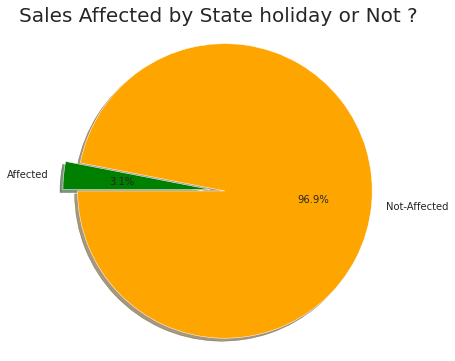

In [22]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.**

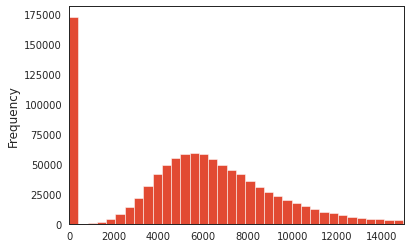

In [23]:
rossman_df["Sales"].plot(kind='hist',bins=100,xlim=(0,15000))

## **Analysing the Store Dataset**

In [24]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [25]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


##### **Checking Information about Dataset**

In [26]:
store_df.shape

(1115, 10)

In [27]:
#Checking info of data as data types and rows and cols
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [28]:
#Checking Null Values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

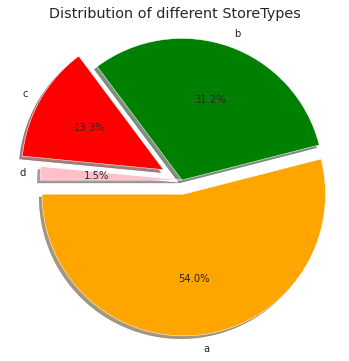

In [29]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [30]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

#### **Replace missing values in features with low percentages of missing values**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

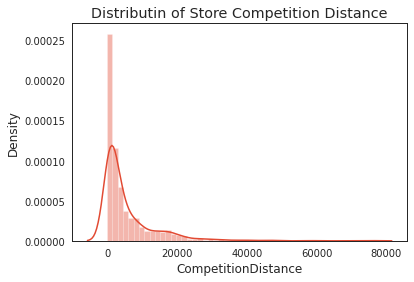

In [31]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [32]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

### **Merging Two Datasets**

In [33]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [34]:
df.shape

(1017209, 17)

## **EDA On Merged Dataset**

In [35]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

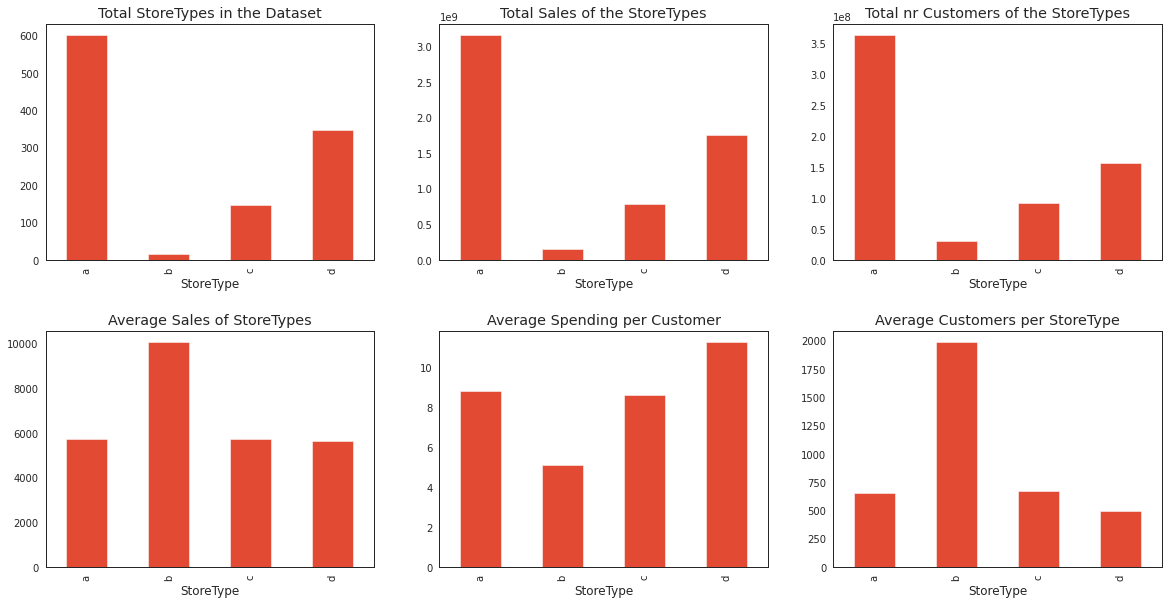

In [36]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

#### **Lets check the Assortments**

So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.




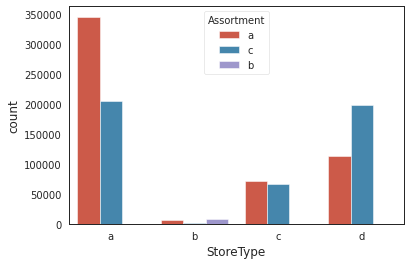

In [37]:
sns.countplot(data = df, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 
print("""So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.\n\n""")

plt.show()

#### **Lets go ahead with the promotions**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


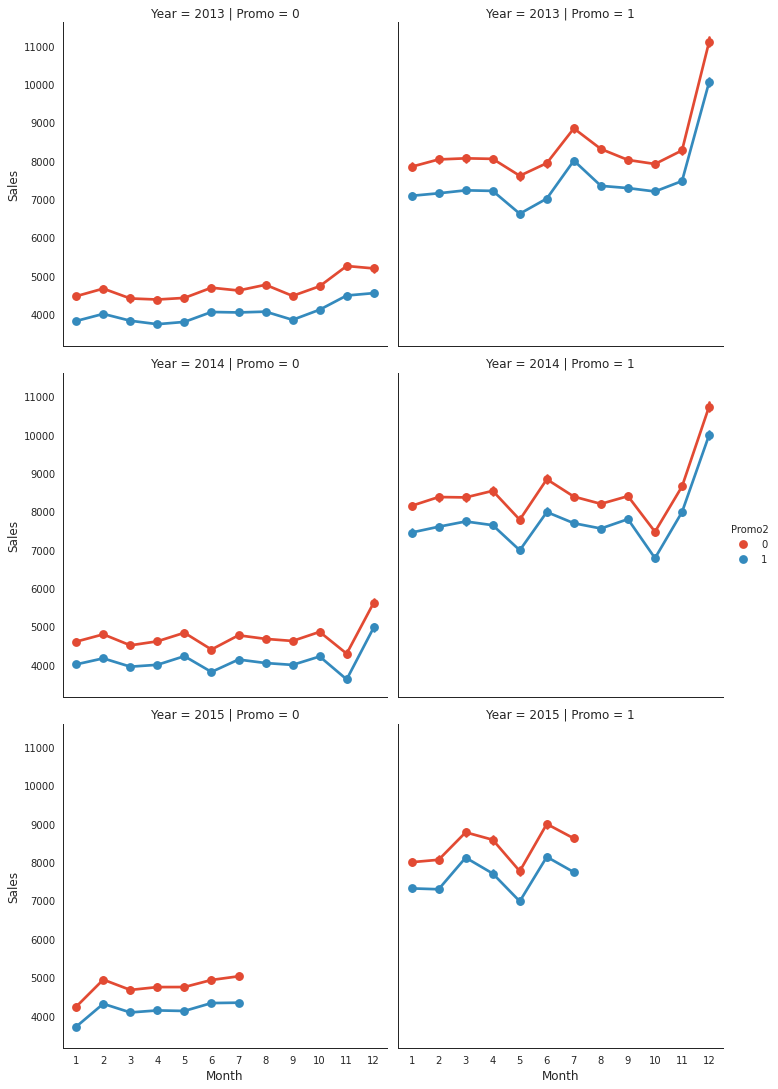

In [38]:
sns.factorplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

**As We can see that when the promo is running Sales are high**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


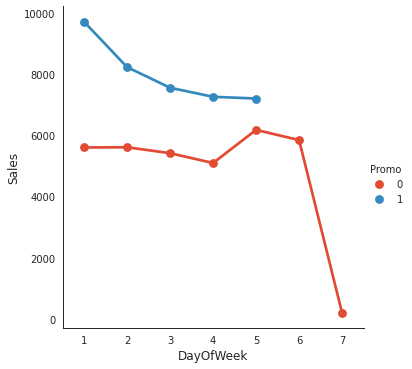

In [39]:
sns.factorplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

In [40]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    

So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


**Let's see the trends on a yearly basis.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


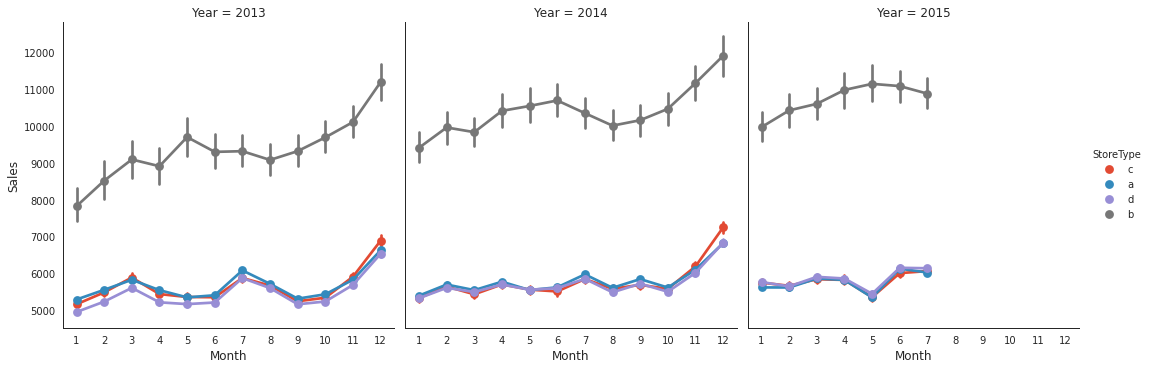

In [41]:
sns.factorplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 

**What about the Competition Distance. What kind of inpact does this have on the sales.**

In [42]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

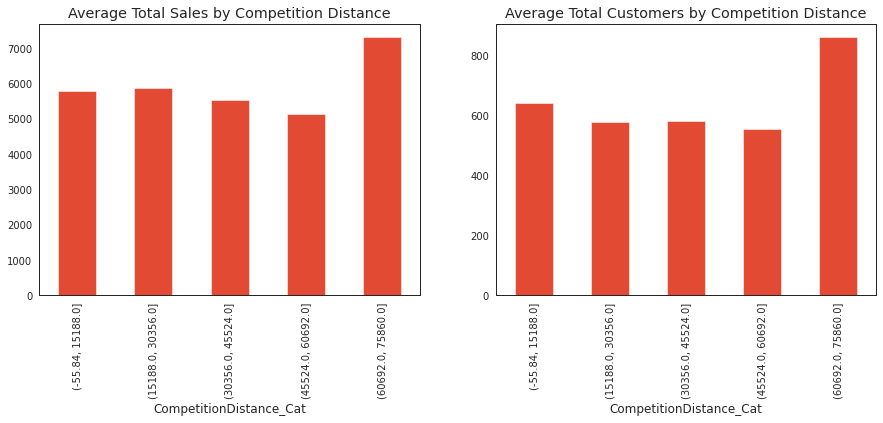

In [43]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [44]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

# **My conclusion of the analysis:**

**StoreType A has the most sells and customers.**

**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**

**StoreTybe D had the highest buyer cart.**

**Promo runs only in weekdays.**

**Promo2 doesnt seems to be correlated to any significant change in the sales amount.**

**Customers tends to buy more on Monday, when there's promotion running (Promo) and on Sundays, when there is no promotion at all.**

### **Drop Subsets Of Data Where Might Cause Bias**

In [45]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [46]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [47]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [48]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [49]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [50]:
df.shape

(844338, 16)

In [51]:
df.info

<bound method DataFrame.info of          Store  DayOfWeek       Date  ...  Assortment  CompetitionDistance  Promo2
0            1          5 2015-07-31  ...           a               1270.0       0
1            2          5 2015-07-31  ...           a                570.0       1
2            3          5 2015-07-31  ...           a              14130.0       1
3            4          5 2015-07-31  ...           c                620.0       0
4            5          5 2015-07-31  ...           a              29910.0       0
...        ...        ...        ...  ...         ...                  ...     ...
1016776    682          2 2013-01-01  ...           a                150.0       0
1016827    733          2 2013-01-01  ...           b                860.0       0
1016863    769          2 2013-01-01  ...           b                840.0       1
1017042    948          2 2013-01-01  ...           b               1430.0       0
1017190   1097          2 2013-01-01  ...           b  

In [52]:
df_new=df.copy()

In [53]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment','Year'])

In [54]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Year_2013,Year_2014,Year_2015
0,1,5,2015-07-31,5263,555,1,0,1,7,31,31,1270.0,0,0,0,1,0,1,0,0,0,0,1
1,2,5,2015-07-31,6064,625,1,0,1,7,31,31,570.0,1,1,0,0,0,1,0,0,0,0,1
2,3,5,2015-07-31,8314,821,1,0,1,7,31,31,14130.0,1,1,0,0,0,1,0,0,0,0,1
3,4,5,2015-07-31,13995,1498,1,0,1,7,31,31,620.0,0,0,0,1,0,0,0,1,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,7,31,31,29910.0,0,1,0,0,0,1,0,0,0,0,1


#### **Setting Features and Target Variables**

In [55]:
X = df_new.drop(['Sales','Store','Date'] , axis = 1)
y= df_new.Sales

In [56]:
X.shape

(844338, 20)

In [57]:
X.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Year_2013,Year_2014,Year_2015
0,5,555,1,0,1,7,31,31,1270.0,0,0,0,1,0,1,0,0,0,0,1
1,5,625,1,0,1,7,31,31,570.0,1,1,0,0,0,1,0,0,0,0,1
2,5,821,1,0,1,7,31,31,14130.0,1,1,0,0,0,1,0,0,0,0,1
3,5,1498,1,0,1,7,31,31,620.0,0,0,0,1,0,0,0,1,0,0,1
4,5,559,1,0,1,7,31,31,29910.0,0,1,0,0,0,1,0,0,0,0,1


In [58]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

#### **Splitting Dataset Into Training Set and Test Set**

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## **Implementing Supervised Machine Learning algorithms.**

## **1.  Linear Regression (OLS)**

In [60]:
l= LinearRegression()
linreg = l.fit(X_train, y_train)

In [61]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
y_predicted = linreg.predict(X_train)
y_test_predicted = linreg.predict(X_test)

print("Regresion Model Score" , ":" , linreg.score(X_train, y_train) , "," ,
      "Test Score" ,":" , linreg.score(X_test, y_test))
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8257968716837057 , Test Score : 0.82360501020396
Training RMSE : 1294.9763017927621 Testing RMSE : 1305.5225946033686
Training MAPE : 14.433546254220742 Testing MAPE : 14.454488176897485


## **Inferences On Linear Regression Coefficients**

In [62]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 2.347e+05
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:00:35   Log-Likelihood:            -7.2502e+06
No. Observations:              844338   AIC:                         1.450e+07
Df Residuals:                  844320   BIC:                         1.450e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -912.8206      4.769   -191.401      0.000    -922.168    -903.473
DayOfWeek             -40.5080      0.867    -46.730      0.000     -42.207     -38.809
Customers               7.3756      0.004   1725.408      0.000       7.367       7.384
Promo                1142.3010      3.059    373.388      0.000    1136.305    1148.297
StateHoliday          240.7904     43.335      5.557      0.000     155.856     325.725
SchoolHoliday          29.3765      3.669      8.006      0.000      22.185      36.568
Month                  47.5413      1.594     29.829      0.000      44.418      50.665
Day                     1.7399      0.167     10.395      0.000       1.412       2.068
WeekOfYear             -2.4976      0.365     -6.839      0.000      -3.213      -1.782
CompetitionDistance     0.0253      0.000    133.767      0.000       0.025       0.026
Promo2                304.3479      2.945    103.358      0.000     298.577     310.119
StoreType_a           329.2939      4.487     73.392      0.000     320.500     338.088
StoreType_b         -2894.2466     12.225   -236.747      0.000   -2918.207   -2870.286
StoreType_c           185.4822      5.143     36.067      0.000     175.403     195.562
StoreType_d          1466.6500      4.894    299.709      0.000    1457.059    1476.241
Assortment_a          970.0118      6.426    150.943      0.000     957.416     982.607
Assortment_b        -3160.3396     14.748   -214.287      0.000   -3189.245   -3131.434
Assortment_c         1277.5072      6.628    192.742      0.000    1264.516    1290.498
Year_2013            -464.7933      2.576   -180.425      0.000    -469.842    -459.744
Year_2014            -355.4975      2.582   -137.682      0.000    -360.558    -350.437
Year_2015             -92.5298      2.775    -33.346      0.000     -97.968     -87.091
==============================================================================
Omnibus:                   198887.142   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1786173.565
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       9.904   Cond. No.                     6.61e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **2. Bayesian Ridge Regression**

In [63]:
rdg = BayesianRidge()
rdgreg = rdg.fit(X_train, y_train)

In [64]:
# validation

y_predicted = rdgreg.predict(X_train)
y_test_predicted = rdgreg.predict(X_test)

print("Regresion Model Score" , ":" , rdgreg.score(X_train, y_train) , "," ,
      "Test Score" ,":" , rdgreg.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8257968713444749 , Test Score : 0.8236050493811198
Training RMSE : 1294.9763030536353 Testing RMSE : 1305.522449625696
Training MAPE : 14.433520229812146 Testing MAPE : 14.454459494991886


## **3. LARS Lasso Regression**

In [65]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)


In [66]:
print("Regresion Model Score" , ":" , lasreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(X_test, y_test))

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8257903236927652 , Out of Sample Test Score : 0.8235947082404128
Training RMSE : 1295.0006395113028 Testing RMSE : 1305.5607171425338
Training MAPE : 14.429531381985692 Testing MAPE : 14.450458697784935


## **4. Decision Tree Regression**

In [67]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [68]:
print("Regresion Model Score" , ":" , treereg.score(X_train, y_train) , "," ,
      "Test Score" ,":" , treereg.score(X_test, y_test))

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999943227000644 , Test Score : 0.9332551530523641
Training RMSE : 7.392728645214063 Testing RMSE : 803.0639682948137
Training MAPE : 0.0013759452676039006 Testing MAPE : 7.484657503616813


 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Decision Tree**

**{ min_samples_split=5,min_samples_leaf=8 }**

In [69]:
# #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

In [70]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [71]:
print("Regresion Model Score" , ":" , treereg.score(X_train, y_train) , "," ,
      "Test Score" ,":" , treereg.score(X_test, y_test))

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9712174346155085 , Test Score : 0.9476025988449783
Training RMSE : 526.3790500011047 Testing RMSE : 711.5347962487899
Training MAPE : 4.963879358152711 Testing MAPE : 6.681282083812334


### **5. Random Forest With Hyper Parameter Tuning**

In [72]:
# #another script that takes toooo long, to find the right parameters for RFR
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Random Forest**

**{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }**

In [73]:
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [74]:
print("Regresion Model Score" , ":" , rdfreg.score(X_train, y_train) , "," ,
      "Test Score" ,":" , rdfreg.score(X_test, y_test))   

y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

Regresion Model Score : 0.9953169230787962 , Test Score : 0.9665483384214195
Training RMSE : 212.3241976571357 Testing RMSE : 568.5257201665318
Training MAPE : 2.03806939138358 Testing MAPE : 5.441601155566211


## **6. K-Nearest Neighbors Regression**

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [76]:
print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

y_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8857624848173182 , Out of Sample Test Score : 0.876211886455679
Training RMSE : 1048.6684932056107 Testing RMSE : 1093.65600537695
Training MAPE : 10.347736594780677 Testing MAPE : 10.747579284001725


## **Feature Importance On Random Forest Regressor**

As we can see that Random Forest has the highest test score

In [77]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

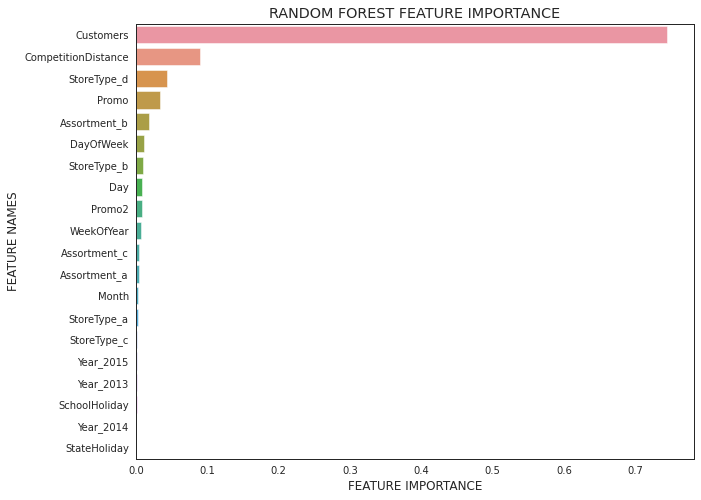

In [78]:
plot_feature_importance(rdfreg.feature_importances_,X_train.columns,'RANDOM FOREST')

**Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.**